# Probability Problem

### Problem - 1

- There are 1000 students who's marks are captured based on thier ability in the test. If the same test is given to a new student, what is the probability of getting 50 Makrs...

In [1]:
from numpy.random import randint as ri
import pandas as pd

In [3]:
# Randomly generating 100 int b/w 30 to 100

marks = ri(30,101,1000)
stu_marks = pd.Series(marks)
stu_marks.head()

0    54
1    94
2    63
3    66
4    79
dtype: int32

In [4]:
# Mean
marks_mean = stu_marks.mean()

print ('mean marks = ', marks_mean)

# Std 
marks_std = stu_marks.std()

print ('marks std = ', marks_std)

mean marks =  63.938
marks std =  20.146116797587123


In [6]:
# What is the probability of a student scoring UPTO 50% 

x = 50

## Probability always between 0 - 1 and starts from 0

In [7]:
import scipy.stats as st

# When x(data) is given then, use cdf function to find the probability of scoring marks upto 50 (x)
prob = st.norm.cdf(x,loc=marks_mean,scale=marks_std)

print (prob)

0.24451718356824026


##### If you want to find the probability of scoring marks greater than 50, you can minus prob (1 - prob)

## How it works

### Z distribution/ statistics

Let's transform our normal distribution into Z distribution (Standard Normal Distribution). Where mean = 0 and std = 1

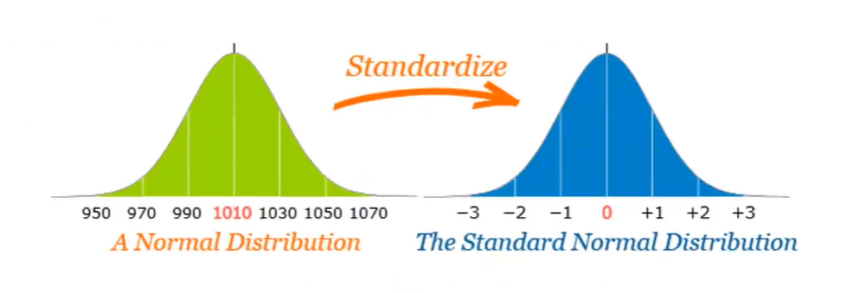

**z = (x-mean)/std**

In [8]:
score = (x - marks_mean) / marks_std
score

-0.6918454876460034

Check the score in z table i.e ======> **z-table.com**

Z Table
Use this z table, also referred as z score table, standard normal distribution table and z value chart, to find a z score. You will also find a z score calculator right after the tables

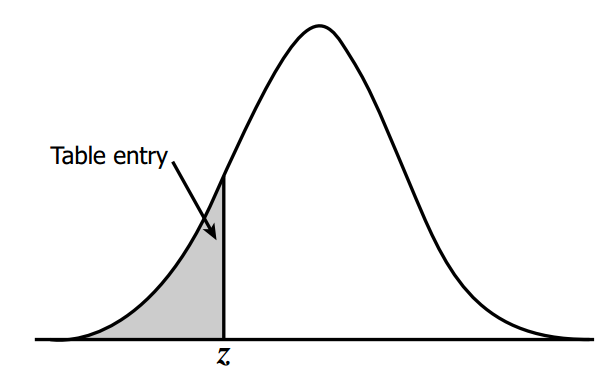 Find values on the left of the mean in this negative Z score table. Table entries for z represent the area under the bell curve to the left of z. Negative scores in the z-table correspond to  the values which are less than the mean.

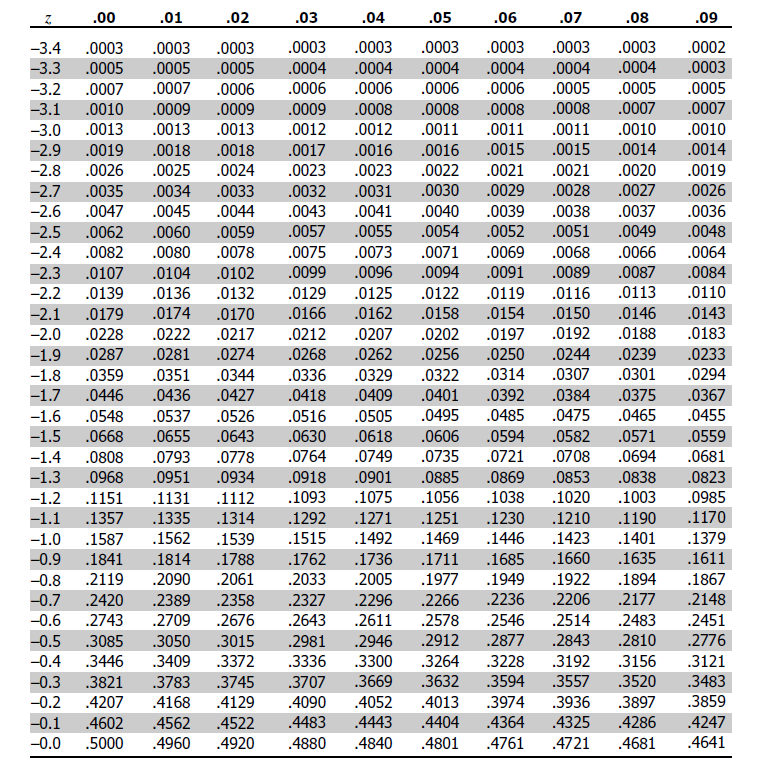

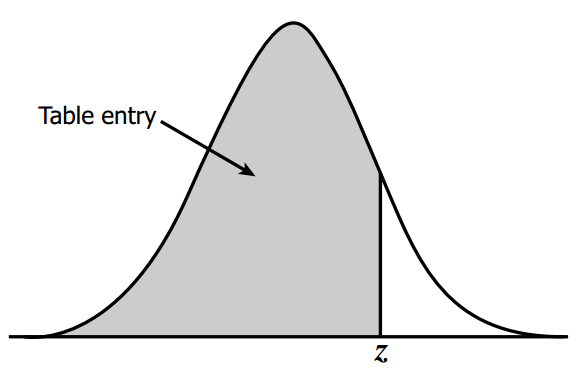
Find values on the right of the mean in this z-table. Table entries for z represent the area under the bell curve to the left of z. Positive scores in the Z-table correspond to  the values which are greater than the mean.

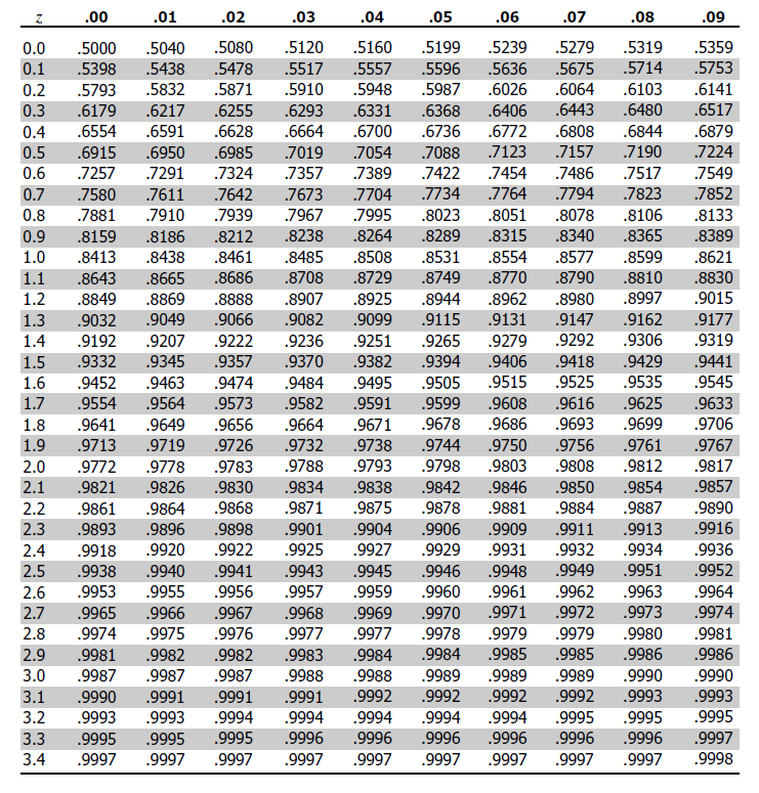

# Problem - 2

Find the probability of getting marks between 50-60

- Rewrite the problem in below form

**p (50<z<60)**

**p ((50-mean)/std<Z<(60-mean)/std)**

In [9]:
# For 50
(50 - marks_mean)/ marks_std

-0.6918454876460034

In [10]:
# For 60
(60 - marks_mean)/ marks_std

-0.1954719134990646

Now Look into the z-table for both 50 and 60. Difference is the probability.

# Hypothesis

Making a guess (not wild guess) based on assumption without scientific proof. or Explaining the situation based on reasonable assumptions.

- **Null Hypothesis      = Ho = > Decisions always leads to status quo, current status/assumption doesn't change.**
- **Alternate Hypothesis = Ha   > Decisions leads to opposite of Ho**

# One tail and Two tails tests
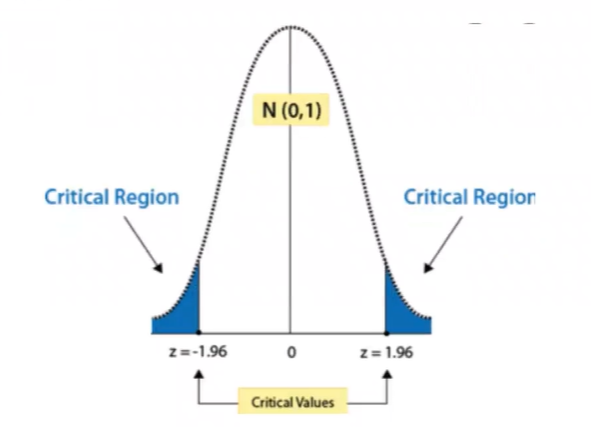

## One tail test

## Left Tail test 

Example - Car mileage test.

- Ho - All our cars average mileage is greater than 25KMPL 
- Ha - Average mileage is less than 25kmpl

Left-tailed test: The alternative hypothesis contains the "<" sign

## Right Tail test

Example - New method will reduce delivery time
- Ho - Our new home delivery method reduces delivery time. 
- Ha - New method will increase the delivery time

Right-tailed test: The alternative hypothesis contains the ">" sign

## Two tail test

Example - Difference in car mileage when drove by two different persons

**Two-tailed test:** The alternative hypothesis contains the "≠" sign

#### Problem
A car manufacturing company claims mileage of all their cars is 25 kmpl. The population standard deviation is known from the past experience to be 1.5 kmpl. A car rental company wants to test the null hypothesis that the average mileage is at least 25 kmpl. Car rental representative drove 30 cars (samples) of the same company and recorded each car mileage. The average mileage of the sample turned out to be 24.2 kmpl.

Test the null hypothesis?

**(HO) Null Hypothesis >= 25**

**(H1) Alternative Hynnthesis 525**


In [11]:
import numpy as np
mean = 25
sample_mean = 24.2
std = 1.5
n = 30

In [12]:
z = (sample_mean - mean)/ (std/np.sqrt(30))
z

# Below Z score need to check in the Z-table to get the p-value

-2.921186973360889

In [13]:
import scipy.stats as st
import numpy as np
p_value = st.norm.cdf(sample_mean,loc=mean,scale=std/np.sqrt(30))
p_value

0.0017435024460706768

## Important points

- Standard alpha level = 0.05 
- If p-value is < 0.05 then we reject null hypothesis (Ho) 
- If p-value is > 0.05 then we failed to reject the Ho

**Conclusion** As the p-value is less than alpha (0.05), we reject the null hypothesis (mileage >= 25kmpl). Which also means that, all the cars do not give 25 mileage so rental company will not buy the cars.

#### Type 1 Error - If Ho is True and you reject Ho

In our example, if average car mileage is really 25 or > 25 kmpl and rental agency rejects it. It's Type 1 error.

#### Type 2 Error - If Ho is False and you failed to reject Ho

If Average car mileage is really < 25 kmpl but rental agency buying cars (failed to reject Ho). It's Type 2 error.

# Statistical Tools
- 1. ttest or student's ttest
- 2. ANOVA
- 3. Chi-square


### ttest

- One sample ttest
- Two sample ttest

In [15]:
import pandas as pd
hyp = pd.read_csv('Hypothesis ttest.csv')
hyp.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [16]:
hyp['Math1'].mean()

52.645

In [17]:
alpha = .05
xbar = 52.645
mu = 60

## 1 Sample t test

In [18]:
import scipy.stats as st

In [19]:
# Since we are conducting test for one sample we will go for 1sample ttest

st.ttest_1samp(hyp.Math1,mu)

Ttest_1sampResult(statistic=-11.102736525713398, pvalue=1.3339158110547646e-22)

When you run ttest, we get 2 values 

- 1. t statistics score and 
- 2. pvalue for two tail

pvalue/2

In [20]:
# Lets write this way

s,p = st.ttest_1samp(hyp.Math1,mu)

In [21]:
s

-11.102736525713398

In [22]:
p

1.3339158110547646e-22

## 2 Sample t test

Independent sample

paired sample

In [23]:
hyp.head()

hyp['Gender'].value_counts()

1    109
0     91
Name: Gender, dtype: int64

In [24]:
# How to subset the data on Gender

hyp[hyp['Gender']==1].Math1.head()

1     53
92    65
93    52
94    46
95    61
Name: Math1, dtype: int64

In [25]:
# Independent sample

t,p=st.ttest_ind(hyp[hyp['Gender']==1].Math1,hyp[hyp['Gender']==0].Math1)

In [26]:
p

0.6800544974232143

# ANOVA (ANalysis Of VAriance)

ANOVA is used to compare differences of means among more than 2 groups. It does this by looking at variation in the data and where that variation is found (hence its name). Specifically, ANOVA compares the amount of variation between groups with the amount of variation within groups.

- Null hypothesis, typically is that, all means are equal. 
- The independent variables are categorical. 
- Dependent variables are continues.

F Value
F = Sample means of between groups/sample means of within groups

#### Realtime research on human body -

**If different types of drinks (Coffee, Water, Milk, Soda etc) have the same effect (reaction time in the morning) on human body or not?**

Null hypothesis - All the drinks average reaction time on humany body is same.

Alternate hypothesis - All the drinks average reaction time on humany body is NOT same.

## Hypothesis construction

The null hypothesis for ANOVA says that, average of dependent variable are same for all the given groups. Alternate Hypothesis says, mean of dependent variable are not same for the given groups.

-Ho : muA = muB = muc

-Ha : not all are equal

In [27]:
#Step 1 Calculate the means of each semester 
#Step 2 Calculate the grand mean 
#Step 3 Variations between, within 
#Step 4 Calculate the mean squared variance of between and within 
#Step 5 Calcualte F statistics and corrosponding p-value

In [28]:
import pandas as pd 
hyp = pd.read_csv('Semester marks.csv') 
hyp

,Student_ID,Semester,Total_Marks
0,1,1,365
1,2,3,376
2,3,1,411
3,4,3,436
4,5,2,366
...,...,...,...
195,196,1,431
196,197,3,330
197,198,1,311
198,199,1,358


As per ANOVA we need to find continues data based on the categorical variable.

- Total_Marks is continues variable and 
- Semester is categorical variable.

**Ho is** Average marks of each semester are almost equal.

**Ha is** all are not equal

In [30]:
import numpy as np
import statsmodels.formula.api as sm

mod=sm.ols('Total_Marks ~ Semester',data=hyp).fit()

mod

In [33]:
import statsmodels.api as k

aov_table=k.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Semester,1.0,291.846746,291.846746,0.102572,0.749102
Residual,198.0,563366.873254,2845.287239,NaN,NaN


###### Let's see manually if the average marks of each semester are close to each other

In [34]:
# Semester 1 Average marks 
print ('1st Sem avg marks = ', np.ceil(hyp['Total_Marks'][hyp['Semester'] == 1].mean()))
# Semester 2 Average marks 
print ('2nd sem avg marks = ', np.ceil(hyp['Total_Marks'][hyp[ 'Semester'] == 2].mean()))
# Semester 3 Average marks 
print ('3rd Sem avg marks = ', np.ceil(hyp['Total_Marks'][hyp[ 'Semester'] == 3].mean()))

1st Sem avg marks =  403.0
2nd sem avg marks =  393.0
3rd Sem avg marks =  406.0


# Chi-Square Test

This test most of the time used for,

- Goodness of fit to a distribution: The Chi-squared test can be used to determine whether your data obeys a known theoretical probability distribution such as the Normal or Poisson distribution.

Example - How much sales we can expect this week (let's say pizza business). According to salesman below are the details.

**Expected** sales in thousands ...................[25, 28, 21, 30, 45, 58, 57]

**Observed** (Actual) sales in thousands -......[23, 26,625, 31, 48, 63, 50]

### Let's understand how to work on this situation.

- We will do this hypothesis testing with a significance of 10%(0.1).(This will be given or you can test according to business interest)

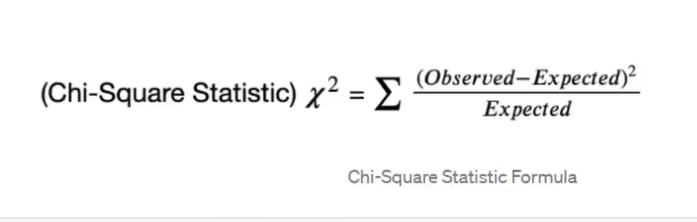

In [1]:
import numpy as np

# Expected [25,28,21,30,45,58,57]
# Observed [23,26,25,31,48,63,50]

chi_ind= [np.square(23-25)/25,
          np.square(26-28)/28,
          np.square(25-21)/21,
          np.square(31-30)/30,
          np.square(48-45)/45,
          np.square(63-58)/58,
          np.square(50-57)/57]

print ("Our Chi Square Test statistics score = > ", np.sum(chi_ind))


Our Chi Square Test statistics score = >  2.5887788436608763


### Let's check Chi-Square distribution table

##### What is the Chi-Square Distribution Table?

The Chi-Square distribution table is a table that shows the critical values of the Chi-Square distribution. To use the Chi-Square distribution table, you only need to know two values:

- The degrees of freedom for the Chi-Square test
- The alpha level for the test (common choices are 0.01, 0.05, and 0.10)

**Degrees of Freedom -** Which means you are allowed to choose/vary the data at certain extent, means freedom is given to vary the data. Example-(N-1). Here N is total events. i.e (7-1) = 6

**DF = 6 and significance level = 0.10**

AND our test score = 2.58

Let's check the critical score where DF and significance level converge

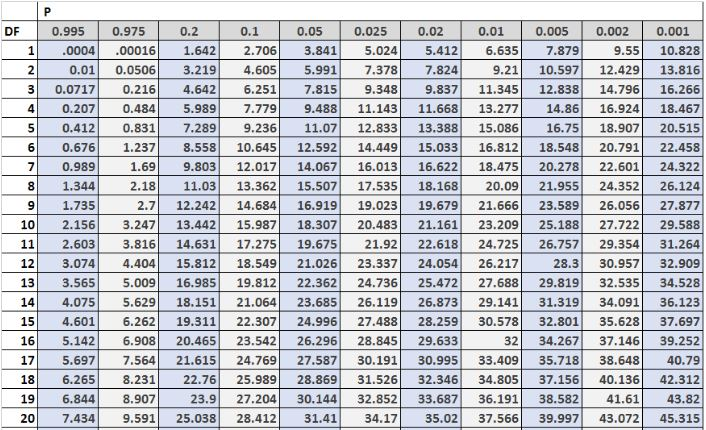

#### Conclusion

As the critical score (in the table) is (10.645) greater than our test score (2.58) we cannot reject the null Hypothesis. Which also means that salesman prediction/expectation was correct.

# Covariance correlation

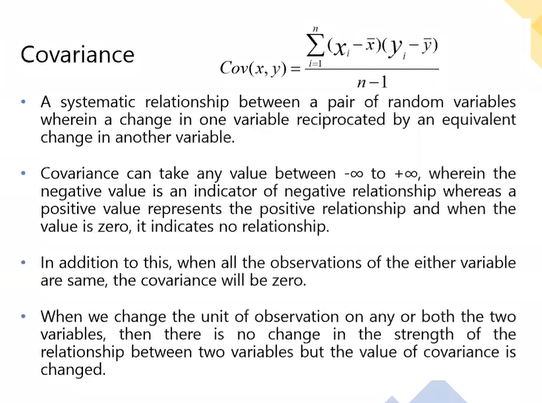

x and y = Variable

xbar = mean of x

ybar = mean of y

n = number of samples

x increase and y increases = Positively related (Age vs Salary)

x increase and y decreases = Negatively related (speed vs time to cover distance)

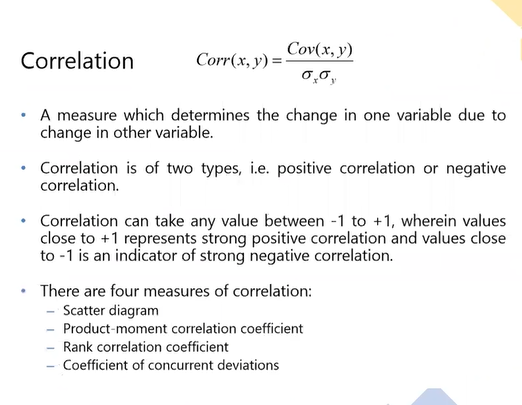

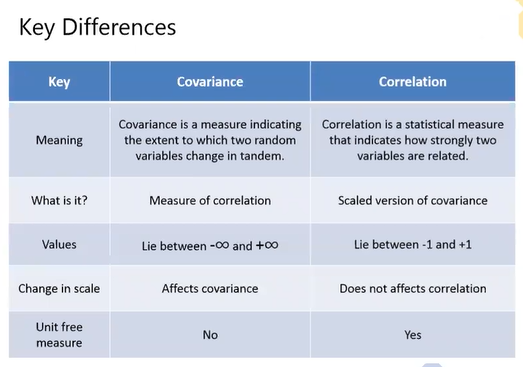

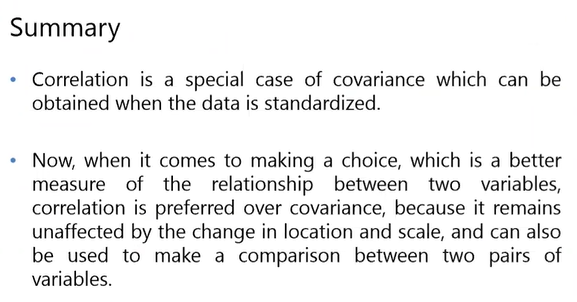